# Week 5 - Coding Exercise
This notebook **is the deliverable** for your weekly coding exercises. Below you will find the text of the exercise and the space to write your code. Feel free to **add additional code cells** if needed. 

## Completion Instructions
1. You are allowed to add additional **cells**. 
1. Unless specified otherwise, you can use as many **intermediate steps** as you want to get to the final result of each point. We will only mark the final result.
1. Some exercises will ask you to perform a calculation and assign the result to a variable with a **specific name**. Assigning the result to a variable with the wrong name will result in **0 marks** for that point.
1. Some exercises will ask you to perform a calculation and assign the result to a variable of a **specific type** (number, Series, DataFrame, etc.). Assigning the result to a variable of the wrong type will result in **0 marks** for that point. You can check the type of an object with the function **[`type()`](https://www.codingem.com/type-of-in-python/)**.
1. The **final result** of each point should be **shown on screen**. For example if you are asked to assign the result of a calculation to a number called `Total`, this number should be visible on screen. If the result is a DataFrame or Series you should show only a few rows with **[`df.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)** or, if more appropriate, **[`df.tail()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html)**. If a final result is not shown on screen, it will lead to **0 marks** for that point.
1. You should not "hard-code" numbers into your calculations if this can be avoided. For example if you need to use the "number of columns" in a DataFrame in a calculation, you should use a command/function to calculate the number of columns and not simply count the columns and use `7` (a hard-coded number) in your calculations. Using hard-coded numbers when this is unnecessary may result in **0 marks** for that point. 


## Submission Instructions
1. Do not change the **name of the file**. Canvas will automatically add your name and student ID to the file.
1. Before submitting the notebook please **check that it runs properly** from top to bottom. To do this, save the file, close it, than re-open it and press the fast-forward button at the top of the notebook or _Restart and Run All Cells_ from the _Kernel_ menu. You can see a discussion of this in this [video](https://youtu.be/P0NyuTGddPo). If your file has a breaking error that does not allow to run the notebook from top to bottom you will receive a **penalty of 5 marks**. 
___

#### Identification
Please enter your **name** and your **student ID** number in this markdown cell:

* **Student Name:** Janet Yellen
* **Student ID:** 123456

Missing name or ID will result in **1 mark penalty**.

___
#### Import Statements
Add in the following cell all the import statements that you need to run the entire notebook. Import statements anywhere else in the notebook will result in a **penalty of 1 mark**.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

___
### Exercise CE5.01
The file `CE5_HSI.csv` contains data on the value of the Hang Seng Index (Hong Kong Stock Market). Load its content into a DataFrame called `hsi_price`. Choose the appropriate index for this DataFrame and be sure that the column with the dates is properly recognized by Pandas as date values **[Point 1: 1 Mark]**.

In [2]:
hsi_price = pd.read_csv('CE5_HSI.csv', parse_dates=['Date']).set_index('Date')
hsi_price.head()

,Price
Date,
1986-12-31,2568.300049
1987-01-02,2540.100098
1987-01-05,2552.399902
1987-01-06,2583.899902
1987-01-07,2607.100098


Create a DataFrame called `past_returns` with a single column (titled `Past Return`) containing the (log) returns of the market over the previous 252 days. This may take a few intermediate steps, but at the end your object should have the following features **[Point 2: 1 Mark]**:
- Be a DataFrame (not a Series)
- Be indexed by Date
- Have no missing values
- Have a single column titled `Past Return`

In [3]:
past_returns = np.log(hsi_price / hsi_price.shift(252))
past_returns.dropna(inplace=True)
past_returns.rename(columns={'Price':'Past Return'}, inplace=True)
past_returns.head()

,Past Return
Date,
1988-01-11,-0.067442
1988-01-12,-0.039222
1988-01-13,-0.068338
1988-01-14,-0.069051
1988-01-15,-0.070430


Create a for loop that iterates over the numbers `21, 63, 126` and, for every iteration **[Point 3: 1 Mark]**:
- Calculates the return of the market over the next `N` days with `N` being 21, 63 or 126.
- Using the relevant function from [Scipy](https://scipy.org/) calculates the Pearson Correlation between `Past Return` and the returns of the market over the next `N` days.
- Prints on screen a string that says: _Holding period: N, Correlation: xxx, P-Value: xxx_ (where xxx are the results of the Scypy function)

In [4]:
for future in [21, 63, 126]:
    future_ret = np.log(hsi_price.shift(-future) / hsi_price)
    future_ret.rename(columns={'Price':'Future Return'}, inplace=True)
    future_ret.dropna(inplace=True)
    temp = past_returns.join(future_ret, how='inner')
    corr, pvalue = stats.pearsonr(temp['Past Return'], temp['Future Return'])
    print(f'Holding period: {future}, Correlation: {corr}, P-Value: {pvalue}')

Holding period: 21, Correlation: -0.045551459313040096, P-Value: 2.1134862817712132e-05
Holding period: 63, Correlation: -0.1114222279812427, P-Value: 2.3784559138385555e-25
Holding period: 126, Correlation: -0.14019160968512795, P-Value: 5.113725051608849e-39


___
### Exercise CE5.02
The files `CE5_Futures_Prices.csv` and `CE5_Futures_Types.csv` contain the same data used in the Notebook 6B (Multi Asset Momentum). Load them in two DataFrames:
- `fut_data`, with the content of `CE5_Futures_Prices.csv`, indexed by Name and Date.
- `fut_types`, with the content of `CE5_Futures_Types.csv`, indexed in whichever way you want (no specific requirement)

Create a DataFrame called `FX_rates` with the same structure as `fut_data` (same columns, index variables, etc.) but containing only the observations where the asset is a `Exchange Rate` type **[Point 4: 1 Mark]**.

In [5]:
fut_data = pd.read_csv('CE5_Futures_Prices.csv', parse_dates=['Date']).set_index(['Name', 'Date'])
fut_data.head()

Price
Name Date             
AEX  1983-01-31  48.37
     1983-02-28  51.26
     1983-03-31  60.24
     1983-04-29  57.42
     1983-05-31  58.88

In [6]:
fut_types = pd.read_csv('CE5_Futures_Types.csv').set_index('Name')
fut_types.head()

,Type
Name,
AUS10Y,Bonds
AUS3Y,Bonds
CAN10Y,Bonds
GER10Y,Bonds
ITA10Y,Bonds


In [7]:
FX_rates = fut_data.join(fut_types)
FX_rates = FX_rates[FX_rates['Type']=='Exchange Rate']
FX_rates = FX_rates.drop(columns=['Type'])
FX_rates.head()

Price
Name   Date                  
AUDJPY 1980-01-31  264.832706
       1980-02-29  276.113646
       1980-03-31  269.633762
       1980-04-30  266.875961
       1980-05-30  256.176720

Add a column called `Past Return` to `FX_rates` with the return of the asset in the previous 6 months. Add another column called `Position` to `FX_rates` with `1` if `Past Return` is negative (a contrarian strategy) and `-1` if the return is positive (or equal to 0). Remember to drop all the observations where the past return is missing **[Point 5: 1 Mark]**.

In [8]:
FX_rates['Past Return'] = np.log(FX_rates['Price'] / FX_rates['Price'].groupby('Name').shift(6))
FX_rates['Position'] = np.where(FX_rates['Past Return']<0,1,-1)
FX_rates.dropna(inplace=True)
FX_rates.head(10)

Price  Past Return  Position
Name   Date                                         
AUDJPY 1980-07-31  262.632427    -0.008343         1
       1980-08-29  255.674662    -0.076907         1
       1980-09-30  246.766015    -0.088624         1
       1980-10-31  247.590008    -0.075010         1
       1980-11-28  252.023388    -0.016346         1
       1980-12-31  239.813393    -0.057422         1
       1981-01-30  240.692865    -0.087234         1
       1981-02-27  243.289483    -0.049654         1
       1981-03-31  246.617252    -0.000603         1
       1981-04-30  247.517662    -0.000292         1

A position equal to `-1` means that for that month the portfolio is selling that asset short. Create a line graph that shows, for every date, how many assets have a position equal to `-1`. The chart should have **[Point 6: 1 Mark]**:
- Size of 12x6
- Title: _"Shorted Assets"_
- Label on Horizontal Axis: _"Investment Period"_
- Label on Vertical Axis: _"N. of Assets"_
- Line Color: Green

In [9]:
short_pos = FX_rates['Position'] == -1
short_pos = short_pos.groupby('Date').sum()
short_pos.head()

Date
1980-07-31    7
1980-08-29    7
1980-09-30    5
1980-10-31    6
1980-11-28    7
Name: Position, dtype: int64

<Axes: title={'center': 'Shorted Assets'}, xlabel='Investment Period', ylabel='N. of Assets'>

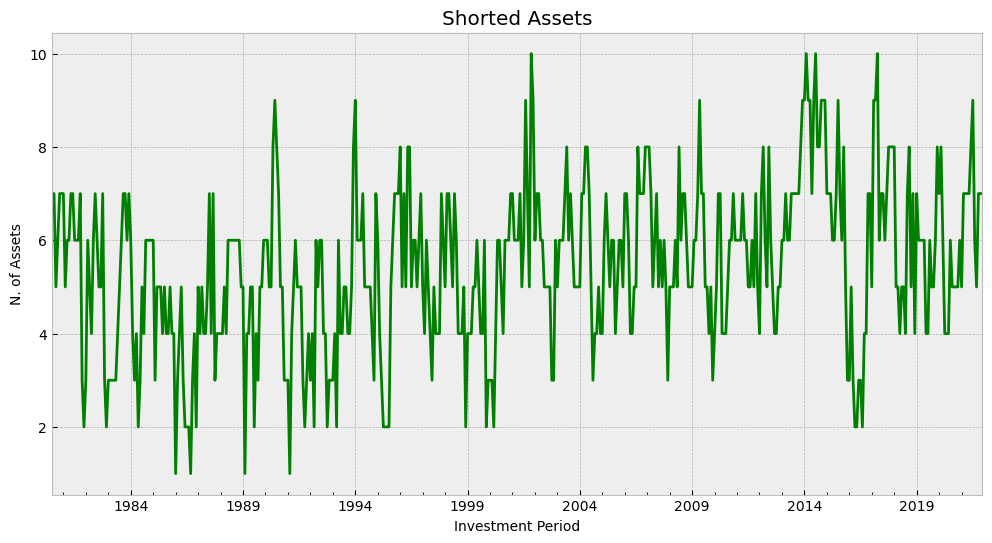

In [10]:
short_pos.plot(kind='line',
             figsize=(12,6),
             title = 'Shorted Assets',
             ylabel = 'N. of Assets',
             xlabel='Investment Period',
             color='green')

Create two series, one called `average_long_return`, and one called `average_short_return`, both indexed by `Date`. These series should have, for every date, the average `past_return` of all the assets held long (for `average_long_return`) and those that are held short (for `average_short_return`) **[Point 7: 1 Mark]**. 

In [11]:
average_long_return = FX_rates[FX_rates['Position']==1].groupby('Date')['Past Return'].mean()
average_long_return.head()

Date
1980-07-31   -0.044440
1980-08-29   -0.124144
1980-09-30   -0.089147
1980-10-31   -0.095669
1980-11-28   -0.053001
Name: Past Return, dtype: float64

In [12]:
average_short_return = FX_rates[FX_rates['Position']==-1].groupby('Date')['Past Return'].mean()
average_short_return.head()

Date
1980-07-31    0.033220
1980-08-29    0.045208
1980-09-30    0.065233
1980-10-31    0.060723
1980-11-28    0.041466
Name: Past Return, dtype: float64

___
### Exercise CE5.03
Again, the files `CE5_Futures_Prices.csv` and `CE5_Futures_Types.csv` contain the same data used in the Notebook 6B (Multi Asset Momentum). If not already done so, load them in two DataFrames:
- `fut_data`, with the content of `CE5_Futures_Prices.csv`, indexed by Name and Date.
- `fut_types` with the content of `CE5_Futures_Types.csv`, indexed in whichever way you want (no specific requirement)

Add to `fut_data` a new column called `type` (lowercase) containing the "type" of the asset (Bonds, Equity, Commodity, etc.) **[Point 8: 1 Mark]**.

In [13]:
fut_data = pd.read_csv('CE5_Futures_Prices.csv', parse_dates=['Date']).set_index(['Name', 'Date'])
fut_types = pd.read_csv('CE5_Futures_Types.csv').set_index('Name')

fut_data = fut_data.join(fut_types)
fut_data.rename(columns={'Type':'type'}, inplace=True)
fut_data.head()

Price    type
Name Date                     
AEX  1983-01-31  48.37  Equity
     1983-02-28  51.26  Equity
     1983-03-31  60.24  Equity
     1983-04-29  57.42  Equity
     1983-05-31  58.88  Equity

Create a new DataFrame called `sample_size` indexed by Date and type with a single column containing the number of available assets for that specific date and type. The resulting object should **[Point 9: 1 Mark]**:
- Be a DataFrame
- Be indexed by Date and type
- Have a single column called _"Assets"_
- The columns should contain, for each date and type of asset, the number of available assets.

In [14]:
sample_size = fut_data.groupby('Date')['type'].value_counts().to_frame()
sample_size.rename(columns={'type':'Assets'}, inplace=True)
sample_size.head()

Assets
Date       type                 
1980-01-31 Commodity          23
           Exchange Rate      10
           Equity              1
1980-02-29 Commodity          23
           Exchange Rate      10

Your Boss appreciates your effort but does not like the way the data is displayed. Use the method **[`DataFrame.unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html)** to create a new DataFrame called `sample_size_v2` where `type` is no longer in the index, but appears as different columns. The final result will be:
- A DataFrame indexed by Date
- With 4 columns (one for each type of assets)

In this DataFrame use the method **[`DataFrame.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)** to replace all the missing values with `0` **[Point 10: 1 Mark]**.

In [15]:
sample_size_v2 = sample_size.unstack(1)
sample_size_v2 = sample_size_v2.fillna(0)
sample_size_v2.head()

Assets                               
type        Bonds Commodity Equity Exchange Rate
Date                                            
1980-01-31    0.0      23.0    1.0          10.0
1980-02-29    0.0      23.0    1.0          10.0
1980-03-31    0.0      23.0    1.0          10.0
1980-04-30    0.0      23.0    1.0          10.0
1980-05-30    0.0      23.0    1.0          10.0